# Fragile vs Robust Decisions: Understanding Stability

This notebook demonstrates the critical distinction between **fragile** and **robust** decisions - and why robust decisions are often better than optimal ones when uncertainty is high.

Understanding fragility vs robustness is essential because:
- **Fragile decisions break easily** - they work perfectly if assumptions are exactly right, but fail completely if anything changes
- **Robust decisions hold up** - they work well across many scenarios, even when assumptions are wrong
- **In uncertainty, robust beats optimal** - a robust decision that works 90% of the time is better than an optimal decision that works 50% of the time
- **Understanding fragility helps you choose** - when to trust a recommendation and when to choose a more robust alternative


## Key Concepts

**Fragile Decisions** break easily when conditions change:
- Work perfectly if assumptions are exactly right
- Fail completely if assumptions are slightly wrong
- Have steep performance curves (small input changes cause large output changes)
- Depend on precise assumptions

**Robust Decisions** hold up under pressure:
- Work well across many scenarios
- Still perform reasonably even when assumptions are wrong
- Have flat performance curves (input changes cause small output changes)
- Don't depend on precise assumptions

**Critical insight**: In uncertain environments, robust decisions are often better than optimal but fragile ones. A robust decision that works 90% of the time beats an optimal decision that works 50% of the time.


## Scenario: Pricing Strategy with Uncertain Demand

You manage pricing for a product. You have two pricing strategies to choose from:
- **Strategy A (Fragile)**: Optimal price that maximizes profit if demand is exactly as forecasted, but profit drops sharply if demand is different
- **Strategy B (Robust)**: Good price that performs well across many demand scenarios, even though it's not optimal for the base case

**The Challenge**: Demand forecasts are uncertain. Which strategy should you choose?

**The Question**: How do these strategies perform as demand varies? Which is more reliable?

**Decision**: Which pricing strategy to use

**Uncertainty**: Demand forecasts vary


## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Define Pricing Strategies

Let's create two pricing strategies with different characteristics:


In [2]:
# Base demand forecast
base_demand = 1000

# Strategy A: Fragile - optimal for base demand but sensitive to changes
def fragile_strategy_profit(demand, base_demand=1000):
    """
    Fragile strategy: Optimal price for base demand, but profit drops sharply
    if demand is different. Price is optimized for exact base demand.
    """
    # Optimal price for base demand
    optimal_price = 50
    
    # Profit calculation: price * demand - cost
    # But profit drops sharply if demand is different (price doesn't adapt)
    unit_cost = 20
    if abs(demand - base_demand) <= 50:  # Close to base demand
        profit = (optimal_price - unit_cost) * demand
    else:  # Far from base demand - profit drops sharply
        # Price is too high for low demand, too low for high demand
        if demand < base_demand:
            # Price too high, lose customers
            effective_demand = demand * 0.7  # 30% of customers leave
            profit = (optimal_price - unit_cost) * effective_demand
        else:
            # Price too low, miss revenue
            profit = (optimal_price - unit_cost) * demand * 0.8  # 20% revenue loss
    
    return profit

# Strategy B: Robust - good across many scenarios
def robust_strategy_profit(demand, base_demand=1000):
    """
    Robust strategy: Good price that works well across many demand scenarios.
    Price is set to perform well across a range, not optimized for one point.
    """
    # Robust price (slightly lower than optimal, but works across range)
    robust_price = 45
    
    # Profit calculation: more stable across demand variations
    unit_cost = 20
    # Price works well across range - less sensitive to demand changes
    if abs(demand - base_demand) <= 200:  # Within reasonable range
        profit = (robust_price - unit_cost) * demand
    else:  # Outside range, but still reasonable
        # More gradual decline
        if demand < base_demand:
            effective_demand = demand * 0.9  # Only 10% loss
            profit = (robust_price - unit_cost) * effective_demand
        else:
            profit = (robust_price - unit_cost) * demand * 0.95  # Only 5% loss
    
    return profit

print("PRICING STRATEGIES:")
print("=" * 80)
print("Strategy A (Fragile): Optimal for base demand, but sensitive to changes")
print("Strategy B (Robust): Good across many scenarios, less sensitive")
print(f"\nBase Demand Forecast: {base_demand} units")


PRICING STRATEGIES:
Strategy A (Fragile): Optimal for base demand, but sensitive to changes
Strategy B (Robust): Good across many scenarios, less sensitive

Base Demand Forecast: 1000 units


## Step 3: Test Performance Across Demand Scenarios

Let's see how each strategy performs as demand varies:


In [3]:
# Test across range of demand scenarios
demand_scenarios = np.arange(700, 1301, 50)  # From 700 to 1300

results = []
for demand in demand_scenarios:
    fragile_profit = fragile_strategy_profit(demand, base_demand)
    robust_profit = robust_strategy_profit(demand, base_demand)
    
    results.append({
        'Demand': demand,
        'Fragile Profit': fragile_profit,
        'Robust Profit': robust_profit,
        'Difference': robust_profit - fragile_profit,
        'Fragile Better': fragile_profit > robust_profit
    })

results_df = pd.DataFrame(results)

print("PERFORMANCE COMPARISON ACROSS DEMAND SCENARIOS:")
print("=" * 80)
display(results_df.round(0))


PERFORMANCE COMPARISON ACROSS DEMAND SCENARIOS:


,Demand,Fragile Profit,Robust Profit,Difference,Fragile Better
0,700,14700.0,15750.0,1050.0,False
1,750,15750.0,16875.0,1125.0,False
2,800,16800.0,20000.0,3200.0,False
3,850,17850.0,21250.0,3400.0,False
4,900,18900.0,22500.0,3600.0,False
5,950,28500.0,23750.0,-4750.0,True
6,1000,30000.0,25000.0,-5000.0,True
7,1050,31500.0,26250.0,-5250.0,True
8,1100,26400.0,27500.0,1100.0,False
9,1150,27600.0,28750.0,1150.0,False


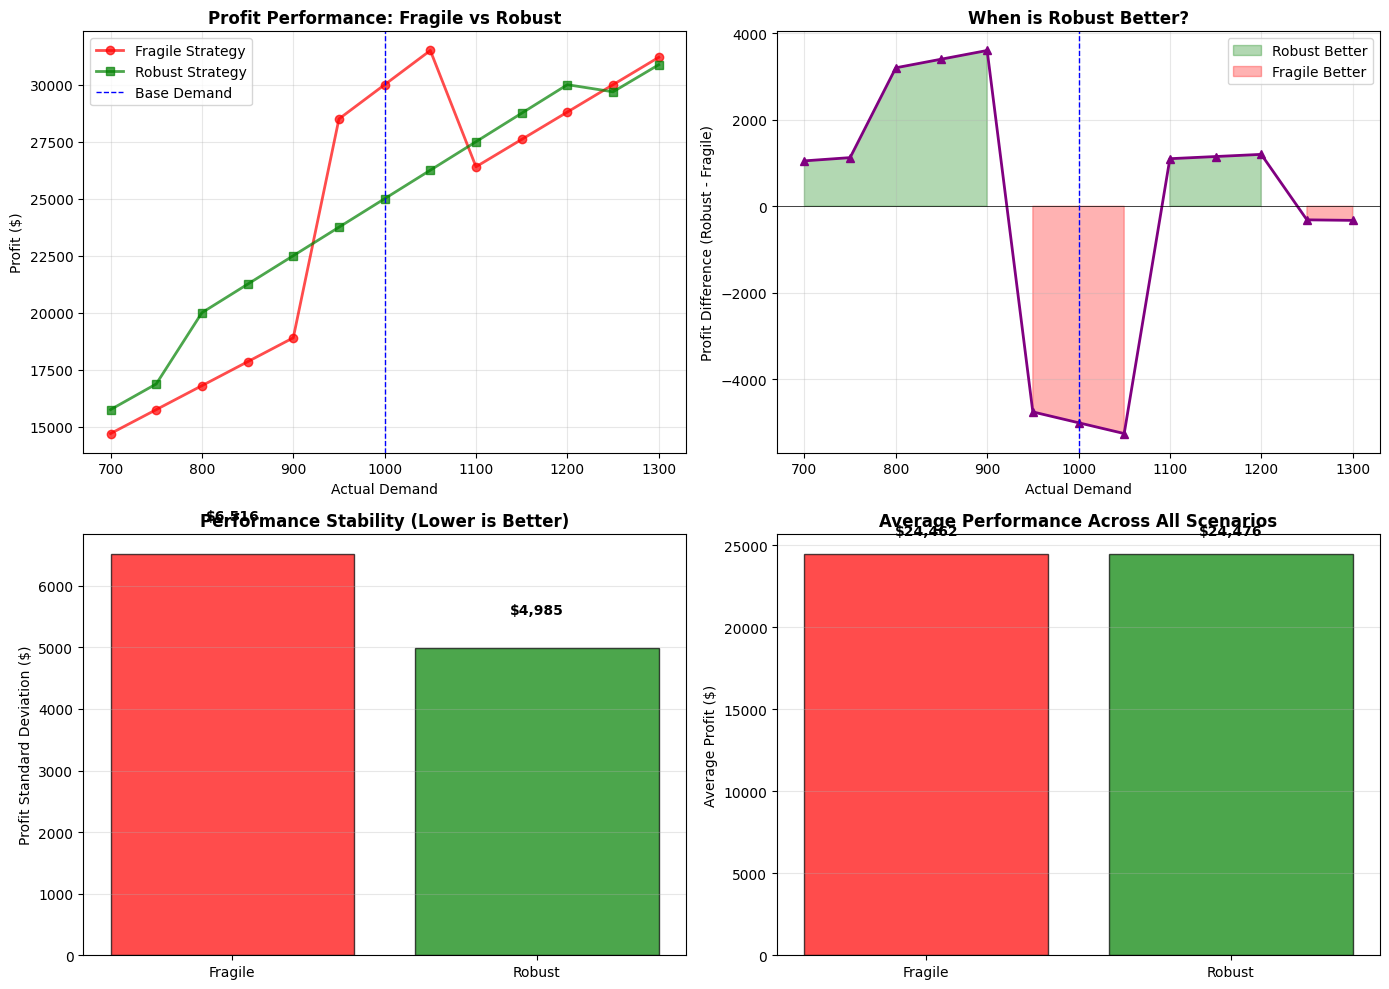


KEY METRICS:
Fragile Strategy:
  Average Profit: $24,462
  Profit Std Dev: $6,516 (higher = less stable)
  Best Case: $31,500
  Worst Case: $14,700

Robust Strategy:
  Average Profit: $24,476
  Profit Std Dev: $4,985 (lower = more stable)
  Best Case: $30,875
  Worst Case: $15,750

Comparison:
  Robust is $14 better on average
  Robust is 0.77x more stable (lower std dev)
  Robust wins in 8 out of 13 scenarios


In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Profit Curves
ax1 = axes[0, 0]
ax1.plot(results_df['Demand'], results_df['Fragile Profit'], 
         marker='o', linewidth=2, markersize=6, color='red', label='Fragile Strategy', alpha=0.7)
ax1.plot(results_df['Demand'], results_df['Robust Profit'], 
         marker='s', linewidth=2, markersize=6, color='green', label='Robust Strategy', alpha=0.7)
ax1.axvline(x=base_demand, color='blue', linestyle='--', linewidth=1, label='Base Demand')
ax1.set_xlabel('Actual Demand')
ax1.set_ylabel('Profit ($)')
ax1.set_title('Profit Performance: Fragile vs Robust', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Performance Difference
ax2 = axes[0, 1]
ax2.plot(results_df['Demand'], results_df['Difference'], 
         marker='^', linewidth=2, markersize=6, color='purple')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.axvline(x=base_demand, color='blue', linestyle='--', linewidth=1)
ax2.fill_between(results_df['Demand'], 0, results_df['Difference'], 
                where=(results_df['Difference'] > 0), alpha=0.3, color='green', label='Robust Better')
ax2.fill_between(results_df['Demand'], 0, results_df['Difference'], 
                where=(results_df['Difference'] < 0), alpha=0.3, color='red', label='Fragile Better')
ax2.set_xlabel('Actual Demand')
ax2.set_ylabel('Profit Difference (Robust - Fragile)')
ax2.set_title('When is Robust Better?', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Performance Stability (Standard Deviation)
ax3 = axes[1, 0]
fragile_std = results_df['Fragile Profit'].std()
robust_std = results_df['Robust Profit'].std()

strategies = ['Fragile', 'Robust']
stds = [fragile_std, robust_std]
colors_bar = ['red', 'green']
bars = ax3.bar(strategies, stds, color=colors_bar, alpha=0.7, edgecolor='black')
ax3.set_ylabel('Profit Standard Deviation ($)')
ax3.set_title('Performance Stability (Lower is Better)', fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for bar, std in zip(bars, stds):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
             f'${std:,.0f}', ha='center', va='bottom', fontweight='bold')

# Plot 4: Average Performance Across Scenarios
ax4 = axes[1, 1]
fragile_avg = results_df['Fragile Profit'].mean()
robust_avg = results_df['Robust Profit'].mean()

bars = ax4.bar(strategies, [fragile_avg, robust_avg], color=colors_bar, alpha=0.7, edgecolor='black')
ax4.set_ylabel('Average Profit ($)')
ax4.set_title('Average Performance Across All Scenarios', fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
for bar, avg in zip(bars, [fragile_avg, robust_avg]):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
             f'${avg:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate key metrics
print("\nKEY METRICS:")
print("=" * 80)
print(f"Fragile Strategy:")
print(f"  Average Profit: ${fragile_avg:,.0f}")
print(f"  Profit Std Dev: ${fragile_std:,.0f} (higher = less stable)")
print(f"  Best Case: ${results_df['Fragile Profit'].max():,.0f}")
print(f"  Worst Case: ${results_df['Fragile Profit'].min():,.0f}")

print(f"\nRobust Strategy:")
print(f"  Average Profit: ${robust_avg:,.0f}")
print(f"  Profit Std Dev: ${robust_std:,.0f} (lower = more stable)")
print(f"  Best Case: ${results_df['Robust Profit'].max():,.0f}")
print(f"  Worst Case: ${results_df['Robust Profit'].min():,.0f}")

print(f"\nComparison:")
print(f"  Robust is ${robust_avg - fragile_avg:,.0f} better on average")
print(f"  Robust is {robust_std/fragile_std:.2f}x more stable (lower std dev)")
print(f"  Robust wins in {sum(results_df['Robust Profit'] > results_df['Fragile Profit'])} out of {len(results_df)} scenarios")


## Step 4: Visualize Fragile vs Robust Performance

Let's create visualizations to see the difference:


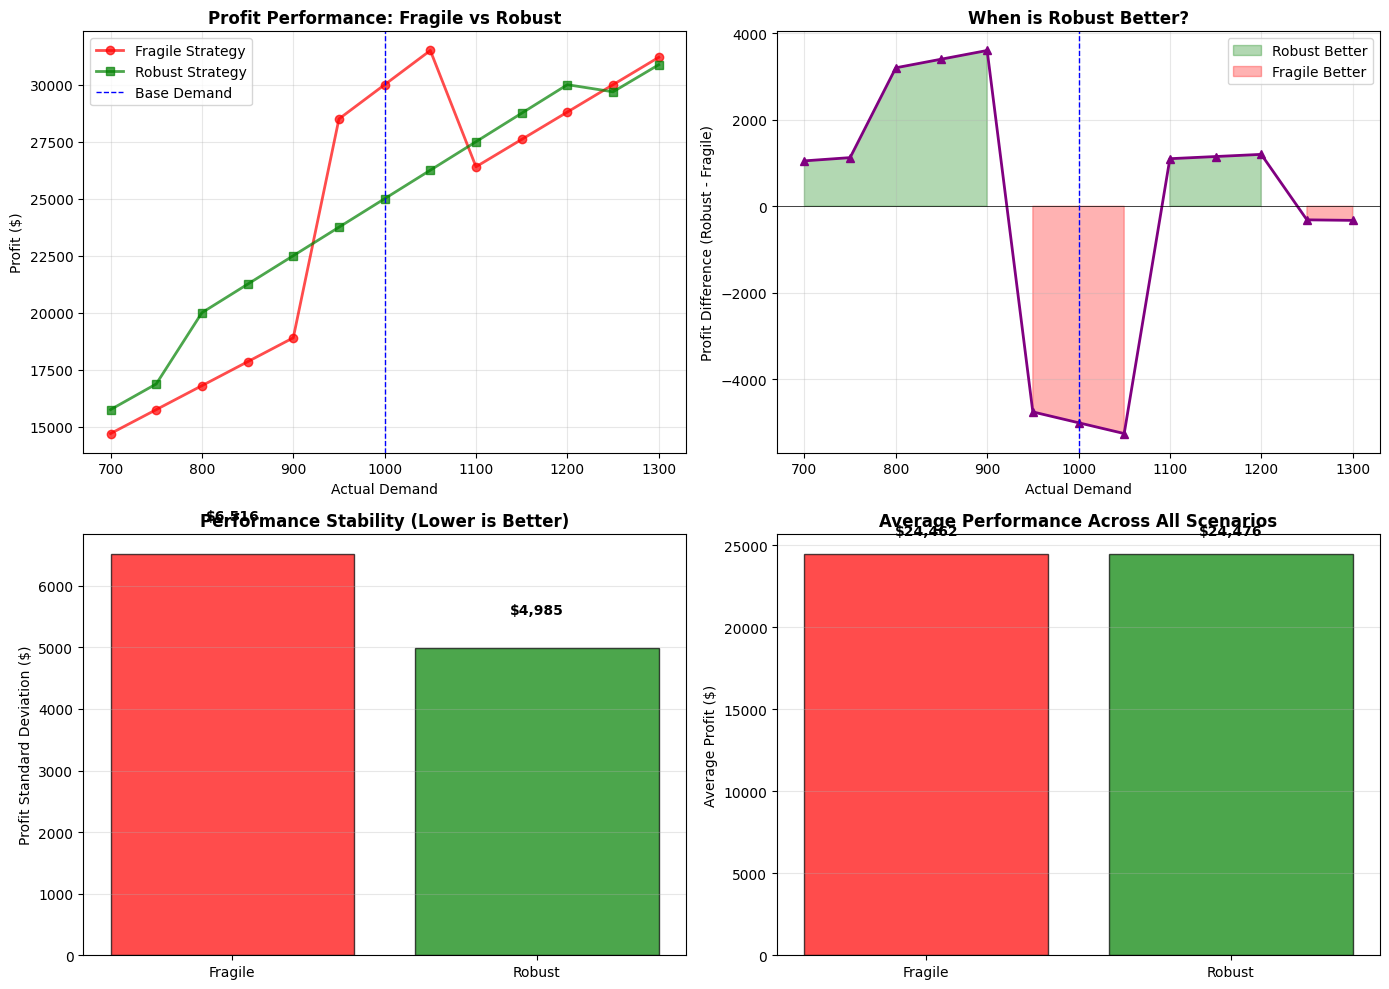


KEY METRICS:
Fragile Strategy:
  Average Profit: $24,462
  Profit Std Dev: $6,516 (higher = less stable)
  Best Case: $31,500
  Worst Case: $14,700

Robust Strategy:
  Average Profit: $24,476
  Profit Std Dev: $4,985 (lower = more stable)
  Best Case: $30,875
  Worst Case: $15,750

Comparison:
  Robust is $14 better on average
  Robust is 0.77x more stable (lower std dev)
  Robust wins in 8 out of 13 scenarios


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Profit Curves
ax1 = axes[0, 0]
ax1.plot(results_df['Demand'], results_df['Fragile Profit'], 
         marker='o', linewidth=2, markersize=6, color='red', label='Fragile Strategy', alpha=0.7)
ax1.plot(results_df['Demand'], results_df['Robust Profit'], 
         marker='s', linewidth=2, markersize=6, color='green', label='Robust Strategy', alpha=0.7)
ax1.axvline(x=base_demand, color='blue', linestyle='--', linewidth=1, label='Base Demand')
ax1.set_xlabel('Actual Demand')
ax1.set_ylabel('Profit ($)')
ax1.set_title('Profit Performance: Fragile vs Robust', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Performance Difference
ax2 = axes[0, 1]
ax2.plot(results_df['Demand'], results_df['Difference'], 
         marker='^', linewidth=2, markersize=6, color='purple')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.axvline(x=base_demand, color='blue', linestyle='--', linewidth=1)
ax2.fill_between(results_df['Demand'], 0, results_df['Difference'], 
                where=(results_df['Difference'] > 0), alpha=0.3, color='green', label='Robust Better')
ax2.fill_between(results_df['Demand'], 0, results_df['Difference'], 
                where=(results_df['Difference'] < 0), alpha=0.3, color='red', label='Fragile Better')
ax2.set_xlabel('Actual Demand')
ax2.set_ylabel('Profit Difference (Robust - Fragile)')
ax2.set_title('When is Robust Better?', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Performance Stability (Standard Deviation)
ax3 = axes[1, 0]
fragile_std = results_df['Fragile Profit'].std()
robust_std = results_df['Robust Profit'].std()

strategies = ['Fragile', 'Robust']
stds = [fragile_std, robust_std]
colors_bar = ['red', 'green']
bars = ax3.bar(strategies, stds, color=colors_bar, alpha=0.7, edgecolor='black')
ax3.set_ylabel('Profit Standard Deviation ($)')
ax3.set_title('Performance Stability (Lower is Better)', fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for bar, std in zip(bars, stds):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
             f'${std:,.0f}', ha='center', va='bottom', fontweight='bold')

# Plot 4: Average Performance Across Scenarios
ax4 = axes[1, 1]
fragile_avg = results_df['Fragile Profit'].mean()
robust_avg = results_df['Robust Profit'].mean()

bars = ax4.bar(strategies, [fragile_avg, robust_avg], color=colors_bar, alpha=0.7, edgecolor='black')
ax4.set_ylabel('Average Profit ($)')
ax4.set_title('Average Performance Across All Scenarios', fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
for bar, avg in zip(bars, [fragile_avg, robust_avg]):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
             f'${avg:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate key metrics
print("\nKEY METRICS:")
print("=" * 80)
print(f"Fragile Strategy:")
print(f"  Average Profit: ${fragile_avg:,.0f}")
print(f"  Profit Std Dev: ${fragile_std:,.0f} (higher = less stable)")
print(f"  Best Case: ${results_df['Fragile Profit'].max():,.0f}")
print(f"  Worst Case: ${results_df['Fragile Profit'].min():,.0f}")

print(f"\nRobust Strategy:")
print(f"  Average Profit: ${robust_avg:,.0f}")
print(f"  Profit Std Dev: ${robust_std:,.0f} (lower = more stable)")
print(f"  Best Case: ${results_df['Robust Profit'].max():,.0f}")
print(f"  Worst Case: ${results_df['Robust Profit'].min():,.0f}")

print(f"\nComparison:")
print(f"  Robust is ${robust_avg - fragile_avg:,.0f} better on average")
print(f"  Robust is {robust_std/fragile_std:.2f}x more stable (lower std dev)")
print(f"  Robust wins in {sum(results_df['Robust Profit'] > results_df['Fragile Profit'])} out of {len(results_df)} scenarios")


## Step 5: Analyze When Each Strategy Wins

Let's see in which scenarios each strategy performs better:


In [6]:
# Identify winning scenarios
fragile_wins = results_df[results_df['Fragile Better']]
robust_wins = results_df[~results_df['Fragile Better']]

print("WHEN DOES EACH STRATEGY WIN?")
print("=" * 80)
print(f"\nFragile Strategy Wins:")
if len(fragile_wins) > 0:
    print(f"  Demand Range: {fragile_wins['Demand'].min():.0f} - {fragile_wins['Demand'].max():.0f} units")
    print(f"  Number of Scenarios: {len(fragile_wins)}")
    print(f"  Average Advantage: ${fragile_wins['Difference'].abs().mean():,.0f}")
else:
    print("  Never wins in tested scenarios")

print(f"\nRobust Strategy Wins:")
if len(robust_wins) > 0:
    print(f"  Demand Range: {robust_wins['Demand'].min():.0f} - {robust_wins['Demand'].max():.0f} units")
    print(f"  Number of Scenarios: {len(robust_wins)}")
    print(f"  Average Advantage: ${robust_wins['Difference'].mean():,.0f}")

# Key insight
print(f"\nKEY INSIGHT:")
if len(robust_wins) > len(fragile_wins):
    print(f"  • Robust strategy wins in MORE scenarios ({len(robust_wins)} vs {len(fragile_wins)})")
    print(f"  • Robust strategy is more reliable when demand is uncertain")
    print(f"  • Even though fragile is optimal at base demand, robust is better overall")
else:
    print(f"  • Fragile strategy wins in more scenarios, but with higher risk")
    print(f"  • Consider the tradeoff between optimality and reliability")


WHEN DOES EACH STRATEGY WIN?

Fragile Strategy Wins:
  Demand Range: 950 - 1300 units
  Number of Scenarios: 5
  Average Advantage: $3,128

Robust Strategy Wins:
  Demand Range: 700 - 1200 units
  Number of Scenarios: 8
  Average Advantage: $1,978

KEY INSIGHT:
  • Robust strategy wins in MORE scenarios (8 vs 5)
  • Robust strategy is more reliable when demand is uncertain
  • Even though fragile is optimal at base demand, robust is better overall


## Step 6: Decision Recommendation

Based on the analysis, which strategy should you choose?


In [7]:
# Decision framework
decision_criteria = pd.DataFrame({
    'Criterion': [
        'Average Performance',
        'Performance Stability',
        'Worst Case Performance',
        'Best Case Performance',
        'Number of Winning Scenarios',
        'Risk Level'
    ],
    'Fragile Strategy': [
        f'${fragile_avg:,.0f}',
        f'High variability (${fragile_std:,.0f} std dev)',
        f'${results_df["Fragile Profit"].min():,.0f}',
        f'${results_df["Fragile Profit"].max():,.0f}',
        f'{len(fragile_wins)} scenarios',
        'High - breaks when assumptions wrong'
    ],
    'Robust Strategy': [
        f'${robust_avg:,.0f}',
        f'Low variability (${robust_std:,.0f} std dev)',
        f'${results_df["Robust Profit"].min():,.0f}',
        f'${results_df["Robust Profit"].max():,.0f}',
        f'{len(robust_wins)} scenarios',
        'Low - works across many scenarios'
    ],
    'Winner': [
        'Robust' if robust_avg > fragile_avg else 'Fragile',
        'Robust' if robust_std < fragile_std else 'Fragile',
        'Robust' if results_df["Robust Profit"].min() > results_df["Fragile Profit"].min() else 'Fragile',
        'Fragile' if results_df["Fragile Profit"].max() > results_df["Robust Profit"].max() else 'Robust',
        'Robust' if len(robust_wins) > len(fragile_wins) else 'Fragile',
        'Robust'
    ]
})

print("DECISION FRAMEWORK:")
print("=" * 80)
display(decision_criteria)

print("\nRECOMMENDATION:")
if robust_avg > fragile_avg and robust_std < fragile_std:
    print("  ✓ Choose ROBUST Strategy")
    print("  • Better average performance")
    print("  • More stable (less risk)")
    print("  • Works well across many scenarios")
    print("  • Even though fragile is optimal at base demand, robust is better overall")
elif fragile_avg > robust_avg and len(fragile_wins) > len(robust_wins):
    print("  ⚠️  Consider FRAGILE Strategy, but with caution")
    print("  • Better average performance")
    print("  • But higher risk if assumptions are wrong")
    print("  • Only choose if you're very confident in demand forecast")
else:
    print("  ✓ Choose ROBUST Strategy")
    print("  • More reliable when uncertainty is high")
    print("  • Lower risk of poor performance")


DECISION FRAMEWORK:


,Criterion,Fragile Strategy,Robust Strategy,Winner
0,Average Performance,"$24,462","$24,476",Robust
1,Performance Stability,"High variability ($6,516 std dev)","Low variability ($4,985 std dev)",Robust
2,Worst Case Performance,"$14,700","$15,750",Robust
3,Best Case Performance,"$31,500","$30,875",Fragile
4,Number of Winning Scenarios,5 scenarios,8 scenarios,Robust
5,Risk Level,High - breaks when assumptions wrong,Low - works across many scenarios,Robust



RECOMMENDATION:
  ✓ Choose ROBUST Strategy
  • Better average performance
  • More stable (less risk)
  • Works well across many scenarios
  • Even though fragile is optimal at base demand, robust is better overall


## Summary: Fragile vs Robust Decisions

**What We Learned**:
- **Fragile decisions** break easily when conditions change - they're optimal if assumptions are exactly right, but fail if assumptions are wrong
- **Robust decisions** hold up under pressure - they work well across many scenarios, even when assumptions are wrong
- **In uncertainty, robust beats optimal** - a robust decision that works 90% of the time is better than an optimal decision that works 50% of the time
- **Understanding fragility helps you choose** - when to trust a recommendation and when to choose a more robust alternative

**Key Insights**:
1. **Identify fragile recommendations**: Look for steep performance curves that drop sharply when inputs change
2. **Identify robust recommendations**: Look for flat performance curves that stay good across scenarios
3. **Choose robust when uncertainty is high**: When inputs are uncertain, prefer robust over optimal
4. **Consider the tradeoff**: Optimal but fragile vs good but robust - choose based on uncertainty level

**Practical Application**:
- Always test how recommendations perform across scenarios
- Identify which recommendations are fragile and which are robust
- When uncertainty is high, choose robust recommendations even if they're not optimal
- Don't assume optimal is always best - robust is often better in uncertain environments
